In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os, sys

In [16]:
import h5py

In [2]:
#this points to the dff analysis files
analysis_path = r'/Volumes/programs/braintv/workgroups/cortexmodels/michaelbu/ObservatoryPlatformPaperAnalysis/platform_boc_2018_09_25/ophys_experiment_analysis'

In [5]:
sys.path.append(r'/Users/saskiad/visual_coding_2p_analysis/visual_coding_2p_analysis')
import core

In [6]:
manifest_file = core.get_manifest_path()

In [7]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
boc = BrainObservatoryCache(manifest_file=manifest_file)

/Users/saskiad/anaconda2/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a 2.7.x release that supports hmac.compare_digest as soon as possible.
  utils.PersistentlyDeprecated2018,


In [10]:
exps = boc.get_ophys_experiments(stimuli=['drifting_gratings'], cre_lines=['Slc17a7-IRES2-Cre','Cux2-CreERT2'])

In [11]:
len(exps)

130

In [33]:
orivals = range(0,360,45)
tfvals = [0,1,2,4,8,15]

In [52]:
df_all= pd.DataFrame(columns=('cell_specimen_id','experiment_container_id','peak_mean','peak_std'))
for i in range(130):
    if np.mod(i,20)==0:
        print i
    session_id = exps[i]['id']
    # print session_id
    analysis_file = os.path.join(analysis_path, str(session_id)+'_three_session_A_analysis.h5')
    # print analysis_file

    mean_sweep_response = pd.read_hdf(analysis_file, 'analysis/mean_sweep_response_dg')
    peak = pd.read_hdf(analysis_file, 'analysis/peak')
    stim_table = pd.read_hdf(analysis_file, 'analysis/stim_table_dg')

    new_df = pd.DataFrame(columns=('cell_specimen_id','experiment_container_id','peak_mean','peak_std'), index=range(len(peak)))
    new_df.cell_specimen_id = peak.cell_specimen_id
    new_df.experiment_container_id = peak.experiment_container_id
    for nc in range(len(peak)):
        pref_ori = orivals[peak.ori_dg.iloc[nc]]
        pref_tf = tfvals[peak.tf_dg.iloc[nc]]
        subset = mean_sweep_response[(stim_table.orientation==pref_ori)&(stim_table.temporal_frequency==pref_tf)][str(nc)]
        new_df.peak_mean.iloc[nc] = subset.mean()
        new_df.peak_std.iloc[nc] = subset.std()
    df_all = df_all.append(new_df)

0
20
40
60
80
100
120


Text(0,0.5,u'std')

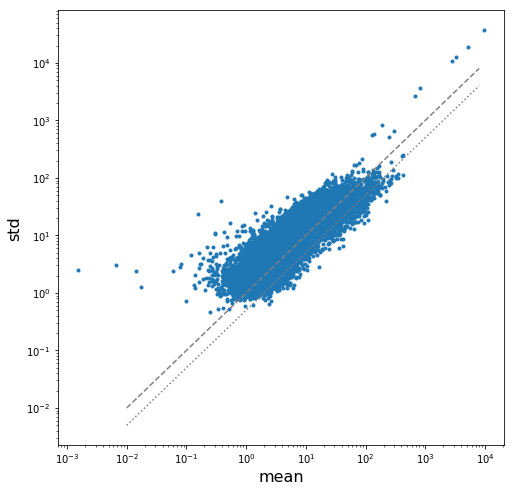

In [78]:
plt.figure(figsize=(8,8))
plt.plot(df_all.peak_mean, df_all.peak_std, '.')
# plt.xlim(0,200)
# plt.ylim(0,200)
plt.plot([.01,8000],[.01,8000], ls='--', color='gray')
plt.plot([.01,8000],[.005,4000], ls=':', color='gray')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('mean', fontsize=16)
plt.ylabel('std', fontsize=16)

In [58]:
df_all.to_csv(r'/Users/saskiad/Documents/CAM/Responsiveness/mean_and_std.csv')

Text(0,0.5,u'std')

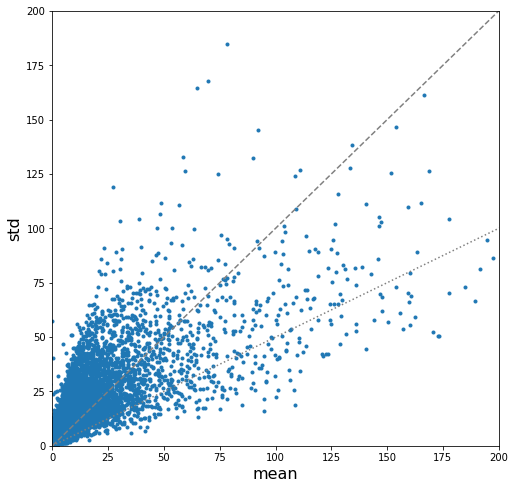

In [80]:
plt.figure(figsize=(8,8))
plt.plot(df_all.peak_mean, df_all.peak_std, '.')
plt.xlim(0,200)
plt.ylim(0,200)
plt.plot([.01,8000],[.01,8000], ls='--', color='gray')
plt.plot([.01,8000],[.005,4000], ls=':', color='gray')
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('mean', fontsize=16)
plt.ylabel('std', fontsize=16)